# About Keras and Tensorflow

[KERAS](https://keras.io/)

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.

[TENSORFLOW](https://www.tensorflow.org/)

A core open source math library whics is used for neural networks. It offers a comprehensive ecosystem of commmunity recources, tools that facilitate building and training machine learning models.

### Plus points of Keras
1. User Friendly: Allows you to build your own models and easy to understand.
2. Support for distributed training.
3. Built in models as well as fast experimentation.
4. Support on multiple backend Tensorflow, Theano and others.

### Some isssue:
1. Debugging is a headache
2. Does not support lower level computation

In [1]:
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
# Layer 1
model.add(Dense(units=4, activation='sigmoid', input_dim=3))
# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
from keras import optimizers
sgd = optimizers.SGD(lr=1)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
import numpy as np
# Fixing a random seed ensures reproducible results
np.random.seed(9)

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])

In [ ]:
model.fit(X, y, epochs=1500, verbose=False)

In [ ]:
print(model.predict(X))


[[0.05032244]
 [0.9230752 ]
 [0.9156965 ]
 [0.09113795]]


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
def preprocess(df):
  # print('----------------------------------------------')
  # print("Before preprocessing")
  # print("Number of rows with 0 values for each variable")
  for col in df.columns:
    # missing_rows=df.loc[df[col]==0].shape[0]
    # print(col+":"+str(missing_rows))
    # print('----------------------------------------------')

    
    # Replace 0 values with the mean of the existing values
    df['Glucose']=df['Glucose'].replace(0, np.nan)
    df['BloodPressure']=df['BloodPressure'].replace(0, np.nan)
    df['SkinThickness']=df['SkinThickness'].replace(0, np.nan)
    df['Insulin']=df['Insulin'].replace(0, np.nan)
    df['BMI']=df['BMI'].replace(0, np.nan)
    df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())
    df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())
    df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())
    df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
    df['BMI']=df['BMI'].fillna(df['BMI'].mean())
  #   print('----------------------------------------------')
  #   print("After preprocessing")
  #   print("Number of rows with 0 values for each variable")
  #   for col in df.columns:
  #     missing_rows=df.loc[df[col]==0].shape[0]
  #     # print(col+":"+str(missing_rows))
  #     # print('----------------------------------------------')
  #     # Standardization
  df_scaled=preprocessing.scale(df)
  df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
  df_scaled['Outcome']=df['Outcome']
  df=df_scaled
  
  return df

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import tkinter
import matplotlib 
matplotlib.use("TkAgg")
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential 
from keras.layers import Dense 
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(16)
try:
  df=pd.read_csv('/content/drive/MyDrive/Demos/diabetes.csv')
except:
  quit()
# Perform preprocessing and feature engineering
df = preprocess(df)
# Split the data into a training and testing set
X=df.loc[:, df.columns!='Outcome']
y=df.loc[:,'Outcome']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
# Build neural network in Keras
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=False)
# Results - Accuracy
scores=model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy:%.2f%%\n"%(scores[1]*100))
scores=model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:%.2f%%\n"%(scores[1]*100))
model.summary()

Training Accuracy:88.93%

Testing Accuracy:78.57%

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


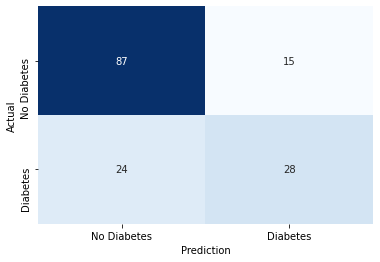

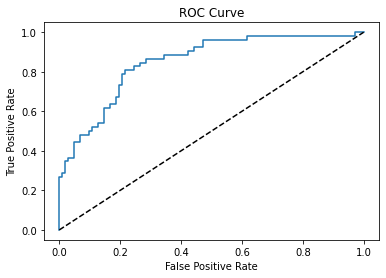

<Figure size 432x288 with 0 Axes>

In [17]:
# Results - Confusion Matrix
y_test_pred=model.predict_classes(X_test)
c_matrix=confusion_matrix(y_test, y_test_pred)
ax=sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'],yticklabels=['No Diabetes','Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()
# Results - ROC Curve
y_test_pred_probs=model.predict(X_test)
FPR, TPR, _=roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
#diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()